In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import rioxarray
from rasterio.plot import show


ImportError: cannot import name 'NDArray' from 'numpy.typing' (/software.el7/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/typing/__init__.py)

In [3]:
IUCN = pd.read_csv("/storage/homefs/ch21o450/IUCN/Habitat_Classifications/Martes_melampus.csv")
convcodes = pd.read_csv("/storage/homefs/ch21o450/LUH2/IUCN_LUH_converion_table_Carlson.csv")
bioscen_species = pd.read_csv("/storage/workspaces/wa_climate/climate_trt/chari/inputdata/bioscen15/mammals/Mammals_GAM_results_climate/Vulpes_vulpes_GAM_dispersal.csv.xz")

In [23]:
bioscen_species.iloc[:,50]

0        0.868018
1        0.892545
2        0.924325
3        0.938341
4        0.955040
           ...   
58485    0.899976
58486    0.915119
58487    0.915113
58488    0.915424
58489    0.772997
Name: MIROC5_rcp60_2032, Length: 58490, dtype: float64

In [11]:
convcodes_renamed = convcodes.rename(columns={'IUCN_hab':'result.code'})

In [12]:
Habitats = IUCN.merge(convcodes_renamed, left_on='result.code', right_on='result.code')
Habitats

,Unnamed: 0,name,result.code,result.habitat,result.suitability,result.season,result.majorimportance,LUH
0,1,Martes melampus,1.4,Forest - Temperate,Suitable,NaN,Yes,primf.secdf
1,2,Martes melampus,14.5,Artificial/Terrestrial - Urban Areas,Marginal,NaN,NaN,urban
2,3,Martes melampus,3.4,Shrubland - Temperate,Marginal,NaN,NaN,primn.secdn


In [24]:
species =rioxarray.open_rasterio("/storage/homefs/ch21o450/data/OutputData/biodiversity/Martes_melampus.tif", mask_and_scale=True)
species

<xarray.DataArray (band: 1, y: 178, x: 720)>
[128160 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * y            (y) float64 81.25 80.75 80.25 79.75 ... -5.75 -6.25 -6.75 -7.25
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  0.9665
    STATISTICS_MEAN:     0.012703216951188
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   0.0673475811427

In [8]:
species.plot()


NameError: name 'species' is not defined

NameError: name 'ccrs' is not defined

<Figure size 864x432 with 0 Axes>

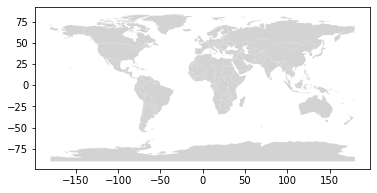

In [69]:
import geopandas as gpd
fig = plt.figure(figsize=(12,6))
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgray")
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)
levels_self = [0,0.2,0.4,0.6,0.8,1]
species.plot(cmap='gist_earth_r',  levels = levels_self)
plt.show()
